# SSP MODELS EXAMPLES

In [1]:
from pymiles.ssp_models import ssp_models as ssp
import matplotlib.pyplot as plt
import numpy as np

The level of verbosity of `pymiles` can be changed using the `logging` module, setting the level to either `WARNING`, `INFO` or `DEBUG`.

In [2]:
import logging
logger = logging.getLogger("pymiles")
# logger.setLevel(logging.DEBUG)

## Initialize

In [3]:
miles = ssp(
    source="MILES_SSP",
    version="9.1",
    imf_type="bi",
    isochrone="P",
    alp_type="fix",
    show_tree=False,
)

### Generate SSP

1. Directly from parameters (interpolated)

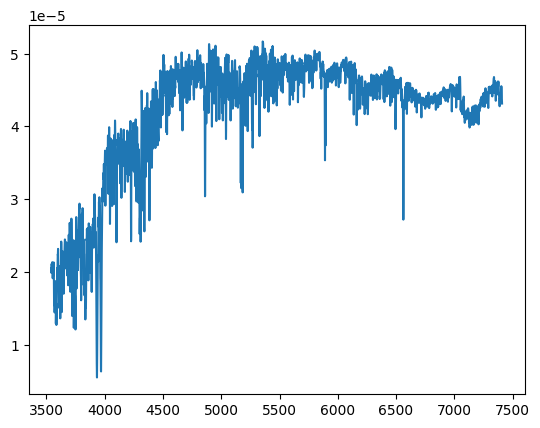

In [4]:
miles_1 = miles.get_ssp_by_params(
    age=5.7, met=-0.45, imf_slope=1.3, return_pars=False
)
plt.plot(miles_1.wave, miles_1.spec)
plt.show()

2. Given a range of values


In [5]:
miles_2 = miles.get_ssp_in_range(
    age_lims=[17.0, 20.0], met_lims=[0.1, 0.5], verbose=False
)
print(miles_1.age)
print(miles_1.met)
print(miles_1.Mass_star_remn)

[5.7]
[-0.45]
0.622357175092374


3.  From a list of parameters

In [6]:
miles_3 = miles.get_ssp_in_list(
    age_list=[0.2512, 0.0708, 1.4125],
    met_list=[0.22, 0.0, -1.71],
    imf_slope_list=[1.3, 1.3, 1.3],
)
print(miles_3.age)

[0.2512 0.0708 1.4125]


### Analyze the spectra

You can load filters from the database and compute derived quantities from those and the SSP spectra

In [7]:
import pymiles.filter as flib
filts = flib.get( flib.search("sloan") )
outmls = miles_1.compute_ml(filters=filts, type="star+remn", verbose=False)

print(
    miles_1.age,
    miles_1.met,
    miles_1.Mass_star_remn,
    outmls["SLOAN_SDSS.u"],
    outmls["SLOAN_SDSS.g"],
    outmls["SLOAN_SDSS.r"],
    outmls["SLOAN_SDSS.i"],
    outmls["SLOAN_SDSS.z"],
)

pymiles.utils: Filter SLOAN_SDSS.i [6430.0,8630.0] is outside of spectral range [3540.5,7409.6]	 Returning nan
pymiles.utils: Filter SLOAN_SDSS.u [2980.0,4130.0] is outside of spectral range [3540.5,7409.6]	 Returning nan
pymiles.utils: Filter SLOAN_SDSS.z [7730.0,11230.0] is outside of spectral range [3540.5,7409.6]	 Returning nan


[5.7] [-0.45] 0.622357175092374 [nan] [1.98569615] [1.67325073] [nan] [nan]


Plot the resulting spectra

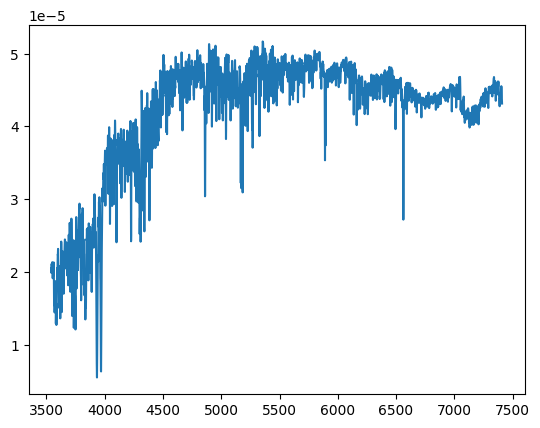

In [8]:
plt.plot(miles_1.wave, miles_1.spec)
plt.show()

##  Tune spectra

`pymiles` already provides some LSF definition files that can be easily loaded.

In [9]:
from pymiles import get_config_file
from astropy.io import ascii
tab = ascii.read( get_config_file("MUSE-WFM.lsf") )
lsf_wave = tab["Lambda"]
lsf = tab["FWHM"] * 0.25

And then easily used for tuning the spectra

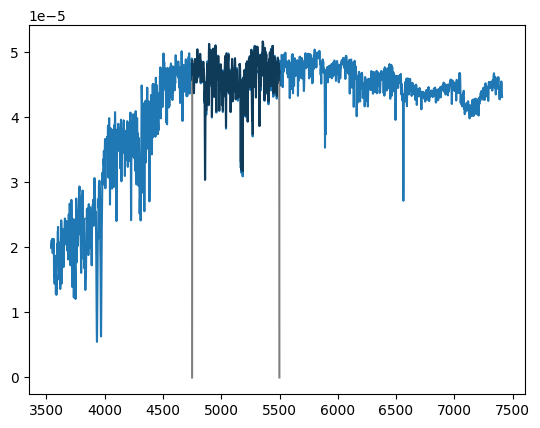

In [10]:
tuned_miles = miles_1.tune_spectra(
    wave_lims=[4750.0, 5500.0],
    dwave=1.0,
    sampling="lin",
    redshift=0.0,
    lsf_flag=True,
    lsf_wave=lsf_wave,
    lsf=lsf,
    verbose=False,
)

plt.plot(miles_1.wave, miles_1.spec)
plt.plot(tuned_miles.wave, tuned_miles.spec, "k", alpha=0.5)
plt.show()

## Saving object to HDF5 file

All the information of the SSP and spectra can be save directly to hdf5 files for reproducibility. It contains all the already computed values for magnitudes, mass-to-ligth ratios and other variables.

In [11]:
tuned_miles.save_object("spectra.hdf5", verbose=True)

## Compute mags

In [12]:
import pymiles.filter as flib
filts = flib.get( flib.search("sdss.r") )
outmags = miles_1.compute_save_mags(
    filters=filts, zeropoint="AB", saveCSV=False, verbose=True
)
print (outmags)

{'SLOAN_SDSS.r': array([5.72204878])}


## Compute LS indices

In [13]:
outls = miles_1.compute_ls_indices(verbose=True, saveCSV=False)
print(outls['Halpha'])

 Progress [####################################################################################################] 100.0% 

[2.41228887]


## Compute solar mags

In [14]:
import pymiles.filter as flib
filts = flib.get( flib.search("sdss.r") )
outmags = miles.compute_mag_sun(filters=filts, verbose=True, zeropoint="AB")
print(outmags)

{'SLOAN_SDSS.r': 4.648245475828894}


## Compute mass-to-light ratios

In [15]:
import pymiles.filter as flib
filts = flib.get( flib.search("sdss.r") )
outmls = miles_1.compute_ml(filters=filts, type="star+remn", verbose=False)
print(outmls)

{'SLOAN_SDSS.r': array([1.67325073])}
